# Workstep Assessment

I made few assumptions. 
1. There was two different explanations about the role types. One said there are five types and one said four types. I assume there are fourand Since there were some missing values in the role type, I assigned OTHER instead of manufacture. But if there are five types we can change other to manufacture.
2. I fill all the null values with 0.
3. There were cases in position id that there was no advertising cost, but there exist and hiring funnel, I assume those are correct and probabley the companies' internal referral who applied through workstep website.
4. To answer Q3 properly and analyze "How quickly is the buildup of approved applications", I need the raw data in personal level, however, I just used this aggregated data to conduct the analysis

In [1]:
# Import necessary packages for this phase of project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read Data
df = pd.read_csv(r'C:\Users\arash\Downloads\202208 - Data Analyst Assessment - Candidate Acquisition Data - Sheet1.csv')
df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
0,75621,PRODUCTION,134935318,2022-08-04 00:00:00,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75621,PRODUCTION,3102362893,2022-08-04 00:00:00,0.003965,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75621,PRODUCTION,3102362893,2022-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,75621,PRODUCTION,7797193831,2022-08-02 00:00:00,0.000000,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75621,PRODUCTION,7797193831,2022-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,18738,WAREHOUSE,200792455,2022-08-11 00:00:00,0.040191,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN
40931,18738,WAREHOUSE,200792455,2022-08-12 00:00:00,0.046853,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40932,18738,WAREHOUSE,200792455,2022-08-13 00:00:00,0.044107,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
40933,18738,WAREHOUSE,200792455,2022-08-14 00:00:00,0.044046,7.0,5.0,4.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [3]:
#Chechink Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40935 entries, 0 to 40934
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_id                  40935 non-null  int64  
 1   position_role_type          40613 non-null  object 
 2   position_id                 40935 non-null  int64  
 3   date                        40935 non-null  object 
 4   spend                       35064 non-null  float64
 5   count_started               34193 non-null  float64
 6   count_submitted             30374 non-null  float64
 7   count_approved              24957 non-null  float64
 8   count_reviewed              17281 non-null  float64
 9   count_expired               3309 non-null   float64
 10  count_withdrawn             19 non-null     float64
 11  count_deactivated           0 non-null      float64
 12  count_position_closed       386 non-null    float64
 13  count_invited_to_interview  140

In [4]:
df.describe()

,company_id,position_id,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
count,40935.000000,4.093500e+04,35064.000000,34193.000000,30374.000000,24957.000000,17281.000000,3309.000000,19.0,0.0,386.000000,14082.000000,873.000000
mean,171236.591132,2.995248e+09,0.027670,4.023338,3.008922,2.685219,3.422950,2.000302,1.0,NaN,3.038860,2.529328,1.227950
std,245413.716385,2.977008e+09,0.048889,6.287897,4.252758,3.657528,5.175763,2.456822,0.0,NaN,3.629753,3.756531,0.767486
min,11405.000000,1.002860e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,NaN,1.000000,1.000000,1.000000
25%,23322.000000,5.537539e+08,0.003270,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,NaN,1.000000,1.000000,1.000000
50%,43959.000000,1.135988e+09,0.011347,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,NaN,1.000000,1.000000,1.000000
75%,91402.000000,5.672027e+09,0.032324,4.000000,3.000000,3.000000,4.000000,2.000000,1.0,NaN,4.000000,3.000000,1.000000
max,940803.000000,9.997425e+09,1.000000,130.000000,88.000000,85.000000,184.000000,47.000000,1.0,NaN,23.000000,184.000000,11.000000


In [5]:
#df[df.position_role_type.isnull()]

In [6]:
df.date = pd.to_datetime(df.date)
df.head()

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_deactivated,count_position_closed,count_invited_to_interview,count_hired
0,75621,PRODUCTION,134935318,2022-08-04,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75621,PRODUCTION,3102362893,2022-08-04,0.003965,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75621,PRODUCTION,3102362893,2022-08-15,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,75621,PRODUCTION,7797193831,2022-08-02,0.000000,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75621,PRODUCTION,7797193831,2022-08-12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check the date, and although the dates go all the way to October they are all for August Hiring Funnel
df.date.sort_values()

24605   2022-07-31
13869   2022-08-01
27577   2022-08-01
5965    2022-08-01
16905   2022-08-01
           ...    
36824   2022-09-29
26677   2022-09-30
38952   2022-10-01
3125    2022-10-01
22921   2022-10-03
Name: date, Length: 40935, dtype: datetime64[ns]

In [8]:
df['position_role_type'] = df['position_role_type'].fillna('Other')


I could also assign(Impute) the most frequent type instead of other or random assigned the type as well.

In [9]:
df = df.fillna(0)
df = df.drop('count_deactivated', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40935 entries, 0 to 40934
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   company_id                  40935 non-null  int64         
 1   position_role_type          40935 non-null  object        
 2   position_id                 40935 non-null  int64         
 3   date                        40935 non-null  datetime64[ns]
 4   spend                       40935 non-null  float64       
 5   count_started               40935 non-null  float64       
 6   count_submitted             40935 non-null  float64       
 7   count_approved              40935 non-null  float64       
 8   count_reviewed              40935 non-null  float64       
 9   count_expired               40935 non-null  float64       
 10  count_withdrawn             40935 non-null  float64       
 11  count_position_closed       40935 non-null  float64   

In [10]:
# Best & worst Position type base on performance

table1 = pd.pivot_table(df, index='position_role_type', values=['spend' , 'count_hired'], aggfunc=np.sum)
table1['performance'] = 100 * table1.spend/table1.count_hired
table1.sort_values('performance')

,count_hired,spend,performance
position_role_type,,,
WAREHOUSE,599.0,468.640259,78.237105
PRODUCTION,379.0,356.856526,94.157395
TRUCKING,39.0,49.192608,126.134894
Other,8.0,11.481912,143.523896
SKILLED_TRADE,47.0,84.032345,178.792224


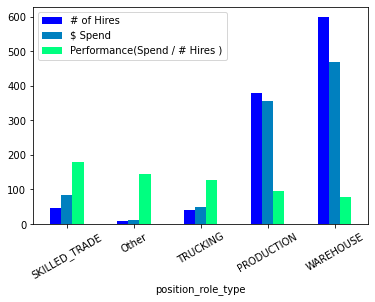

In [11]:
table1.sort_values('performance', ascending=False
                  ).plot(kind='bar', cmap='winter')
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(labels=['# of Hires', '$ Spend', 'Performance(Spend / # Hires )']);

The above chart shows that Warehouse has the best performance and skilled trade has the worst perforemance defince by capital spend by numbers of hires

In [12]:
# Best & worst Company base on performance

table2 = pd.pivot_table(df, index='company_id', values=[ 'spend' , 'count_hired'], aggfunc=np.sum)
table2['performance'] = 100 * table2.spend/table2.count_hired
table2.sort_values('performance')

,count_hired,spend,performance
company_id,,,
217743,3.0,0.447858,14.928602
629687,85.0,14.589868,17.164551
14221,2.0,0.360912,18.045608
12155,5.0,0.995217,19.904342
20805,5.0,1.003038,20.060762
...,...,...,...
86076,0.0,0.000000,NaN
92136,0.0,0.000000,NaN
365654,0.0,0.000000,NaN


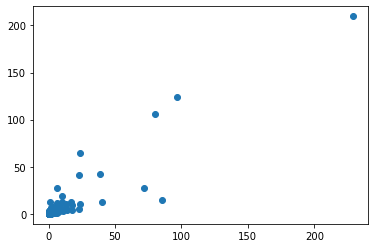

In [13]:
plt.scatter(x=table2.count_hired, y=table2.spend)

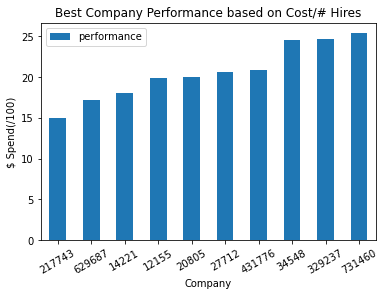

In [14]:
pd.DataFrame(table2.performance.nsmallest(10)).plot(kind='bar')

plt.xlabel('Company')
plt.ylabel('$ Spend(/100)');
plt.title('Best Company Performance based on Cost/# Hires')
plt.xticks(rotation=30, horizontalalignment="center");

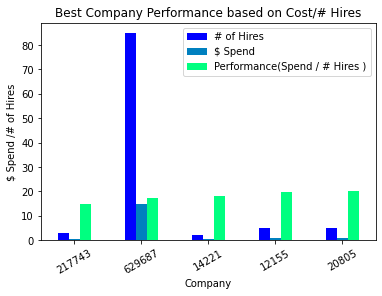

In [15]:
pd.DataFrame(table2[table2.spend != 0].sort_values('performance').nsmallest(columns='performance',n=5)).plot(kind='bar', cmap='winter')

plt.xlabel('Company')
plt.ylabel('$ Spend /# of Hires');
plt.title('Best Company Performance based on Cost/# Hires')
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(labels=['# of Hires', '$ Spend', 'Performance(Spend / # Hires )']);

In [16]:
table2['performance'] = table2.spend/table2.count_hired
table2.replace([np.inf, -np.inf], np.nan, inplace=True)
table2[table2.performance.notnull()].sort_values('performance', ascending=False)

,count_hired,spend,performance
company_id,,,
54042,1.0,12.626533,12.626533
403553,6.0,27.676070,4.612678
346676,1.0,3.980185,3.980185
73394,1.0,3.732378,3.732378
868835,1.0,3.561146,3.561146
...,...,...,...
20805,5.0,1.003038,0.200608
12155,5.0,0.995217,0.199043
14221,2.0,0.360912,0.180456


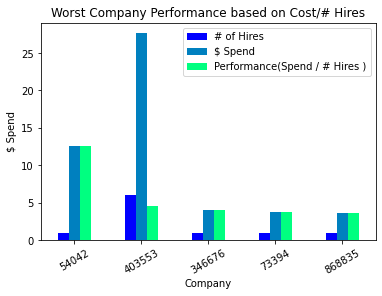

In [17]:
pd.DataFrame(table2.sort_values('performance').nlargest(columns='performance',n=5)).plot(kind='bar', cmap='winter')

plt.xlabel('Company')
plt.ylabel('$ Spend')
plt.title('Worst Company Performance based on Cost/# Hires')
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(labels=['# of Hires', '$ Spend', 'Performance(Spend / # Hires )']);

In [18]:
# Best & worst Position ID base on performance

table3 = pd.pivot_table(df, index='position_id', values=['spend' , 'count_hired'], aggfunc=np.sum)
table3['performance'] = table3.spend/table3.count_hired
table3[table3.performance.notnull()].sort_values('performance')

,count_hired,spend,performance
position_id,,,
488966091,1.0,0.000000,0.000000
177912400,1.0,0.000000,0.000000
738751122,1.0,0.000000,0.000000
876731926,2.0,0.000000,0.000000
827810278,1.0,0.002867,0.002867
...,...,...,...
720646650,0.0,0.135153,inf
722502666,0.0,0.280482,inf
723373847,0.0,0.000622,inf


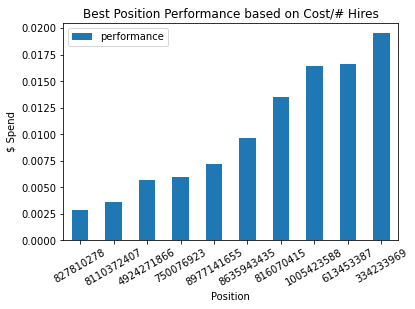

In [19]:
pd.DataFrame(table3[table3.performance != 0].performance.nsmallest(10)).plot(kind='bar')

plt.xlabel('Position')
plt.ylabel('$ Spend');
plt.title('Best Position Performance based on Cost/# Hires')
plt.xticks(rotation=30, horizontalalignment="center");

In [20]:
table3[table3.performance.notnull() & table3.spend > 0].sort_values('performance')

,count_hired,spend,performance
position_id,,,
827810278,1.0,0.002867,0.002867
8110372407,1.0,0.003563,0.003563
4924271866,1.0,0.005698,0.005698
750076923,1.0,0.005991,0.005991
8977141655,1.0,0.007150,0.007150
...,...,...,...
186897907,0.0,0.075745,inf
774688306,0.0,0.137569,inf
774666026,0.0,0.192157,inf


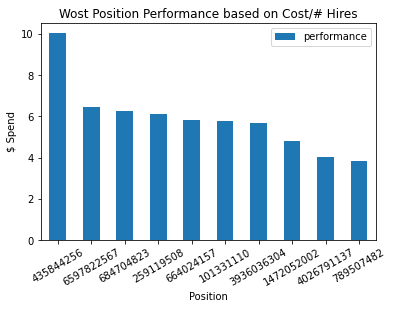

In [21]:
pd.DataFrame(table3[table3.performance < np.inf].performance.nlargest(10)).plot(kind='bar')

plt.xlabel('Position')
plt.ylabel('$ Spend');
plt.title('Wost Position Performance based on Cost/# Hires')
plt.xticks(rotation=30, horizontalalignment="center");

In [22]:
table3.replace([np.inf, -np.inf], np.nan, inplace=True)
table3[table3.performance.notnull()].sort_values('performance', ascending=False)

,count_hired,spend,performance
position_id,,,
435844256,1.0,10.037665,10.037665
6597822567,1.0,6.452104,6.452104
684704823,1.0,6.289511,6.289511
259119508,1.0,6.109201,6.109201
664024157,2.0,11.655962,5.827981
...,...,...,...
827810278,1.0,0.002867,0.002867
177912400,1.0,0.000000,0.000000
738751122,1.0,0.000000,0.000000


## Q2

In [23]:
df[df.count_hired == 0].groupby('position_role_type')['spend'].sum().reset_index(name='sum').sort_values('sum', ascending=False)

,position_role_type,sum
4,WAREHOUSE,457.291194
1,PRODUCTION,349.266890
2,SKILLED_TRADE,83.920204
3,TRUCKING,49.126575
0,Other,11.326065


In [24]:
df1 = pd.DataFrame((df.groupby('position_id')['count_hired'].sum() == 0)).rename(columns={'count_hired' : 'no_hire'})
df = df.merge(df1, on='position_id')
df

,company_id,position_role_type,position_id,date,spend,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_position_closed,count_invited_to_interview,count_hired,no_hire
0,75621,PRODUCTION,134935318,2022-08-04,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,75621,PRODUCTION,3102362893,2022-08-04,0.003965,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,75621,PRODUCTION,3102362893,2022-08-15,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True
3,75621,PRODUCTION,7797193831,2022-08-02,0.000000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,75621,PRODUCTION,7797193831,2022-08-12,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,18738,WAREHOUSE,200792455,2022-08-11,0.040191,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,False
40931,18738,WAREHOUSE,200792455,2022-08-12,0.046853,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
40932,18738,WAREHOUSE,200792455,2022-08-13,0.044107,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,False
40933,18738,WAREHOUSE,200792455,2022-08-14,0.044046,7.0,5.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,False


In [25]:
print('${} capital was spent on positions without a single hire.'.format( round(df[df.no_hire == True]['spend'].sum(),2)))

$479.97 capital was spent on positions without a single hire.


## Q3

In [26]:
values = ['count_started', 'count_submitted', 'count_approved', 'count_reviewed', 'count_expired', 'count_withdrawn', 'count_position_closed',
     'count_invited_to_interview', 'count_hired', 'spend']

table1 = pd.pivot_table(df, index='position_role_type', values= values, aggfunc=np.sum)
table1['performance'] = table1.spend/table1.count_hired

table1 = table1[ values + ['performance']]
table1.sort_values('performance')

,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_position_closed,count_invited_to_interview,count_hired,spend,performance
position_role_type,,,,,,,,,,,
WAREHOUSE,67721.0,45187.0,33486.0,28802.0,3851.0,9.0,805.0,20681.0,599.0,468.640259,0.782371
PRODUCTION,51065.0,34304.0,25994.0,24201.0,1614.0,9.0,143.0,11175.0,379.0,356.856526,0.941574
TRUCKING,4789.0,2977.0,1792.0,1586.0,127.0,0.0,77.0,1112.0,39.0,49.192608,1.261349
Other,1269.0,653.0,463.0,397.0,51.0,0.0,15.0,291.0,8.0,11.481912,1.435239
SKILLED_TRADE,12726.0,8272.0,5280.0,4166.0,976.0,1.0,133.0,2359.0,47.0,84.032345,1.787922


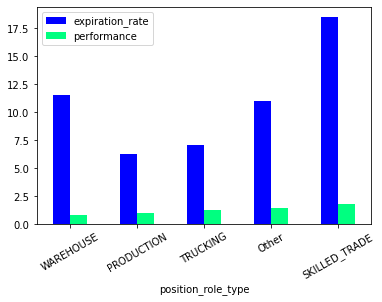

In [27]:
table1['expiration_rate'] = 100 * (table1.count_expired / table1.count_approved)

table1[['expiration_rate', 'performance']].sort_values('performance').plot(kind='bar', cmap='winter')
plt.xticks(rotation=30, horizontalalignment="center");

In [28]:
table1

,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_position_closed,count_invited_to_interview,count_hired,spend,performance,expiration_rate
position_role_type,,,,,,,,,,,,
Other,1269.0,653.0,463.0,397.0,51.0,0.0,15.0,291.0,8.0,11.481912,1.435239,11.015119
PRODUCTION,51065.0,34304.0,25994.0,24201.0,1614.0,9.0,143.0,11175.0,379.0,356.856526,0.941574,6.209125
SKILLED_TRADE,12726.0,8272.0,5280.0,4166.0,976.0,1.0,133.0,2359.0,47.0,84.032345,1.787922,18.484848
TRUCKING,4789.0,2977.0,1792.0,1586.0,127.0,0.0,77.0,1112.0,39.0,49.192608,1.261349,7.087054
WAREHOUSE,67721.0,45187.0,33486.0,28802.0,3851.0,9.0,805.0,20681.0,599.0,468.640259,0.782371,11.500328


In [29]:
values = ['count_started', 'count_submitted', 'count_approved', 'count_reviewed', 'count_expired', 'count_withdrawn', 'count_position_closed',
     'count_invited_to_interview', 'count_hired', 'spend']

table2 = pd.pivot_table(df, index='position_id', values= values, aggfunc=np.sum)
table2['performance'] =  table2.spend/table2.count_hired

table2 = table2[ values + ['performance']]
table2.sort_values('count_hired', ascending=False)

,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_position_closed,count_invited_to_interview,count_hired,spend,performance
position_id,,,,,,,,,,,
2052656319,421.0,322.0,280.0,258.0,22.0,0.0,0.0,254.0,40.0,3.236460,0.080911
728721297,239.0,170.0,150.0,150.0,0.0,0.0,0.0,143.0,16.0,1.208153,0.075510
837282419,293.0,214.0,136.0,136.0,0.0,0.0,0.0,134.0,13.0,2.095853,0.161219
785394580,374.0,264.0,216.0,198.0,16.0,0.0,0.0,160.0,13.0,2.166949,0.166688
324145561,256.0,203.0,195.0,190.0,5.0,0.0,0.0,88.0,12.0,1.034041,0.086170
...,...,...,...,...,...,...,...,...,...,...,...
308833017,19.0,10.0,8.0,2.0,0.0,0.0,6.0,0.0,0.0,0.068388,inf
865326975,122.0,101.0,40.0,40.0,0.0,0.0,0.0,4.0,0.0,0.521688,inf
864290649,25.0,19.0,8.0,3.0,5.0,0.0,0.0,3.0,0.0,0.145463,inf


In [30]:
hire_date = pd.DataFrame(df[df.count_hired > 0].groupby('position_id')['date'].max())
apply_date = pd.DataFrame(df.groupby('position_id')['date'].min())

In [31]:
table2 = table2.merge(apply_date, on='position_id')
table2 = table2.merge(hire_date, on='position_id')
table2.rename(columns={'date_x': 'apply_date', 'date_y': 'hire_date'}, inplace=True)

table2['expiration_rate'] = 100 * table2.count_expired / table2.count_approved

table2.sort_values('performance', ascending=False)

,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_position_closed,count_invited_to_interview,count_hired,spend,performance,apply_date,hire_date,expiration_rate
position_id,,,,,,,,,,,,,,
435844256,1608.0,950.0,569.0,569.0,0.0,0.0,0.0,92.0,1.0,10.037665,10.037665,2022-08-01,2022-08-18,0.000000
6597822567,1316.0,896.0,562.0,562.0,0.0,0.0,0.0,28.0,1.0,6.452104,6.452104,2022-08-01,2022-09-15,0.000000
684704823,1294.0,784.0,682.0,679.0,0.0,0.0,0.0,46.0,1.0,6.289511,6.289511,2022-08-01,2022-09-19,0.000000
259119508,854.0,561.0,455.0,455.0,0.0,0.0,0.0,254.0,1.0,6.109201,6.109201,2022-08-01,2022-08-30,0.000000
664024157,1193.0,612.0,357.0,313.0,43.0,0.0,0.0,162.0,2.0,11.655962,5.827981,2022-08-01,2022-09-05,12.044818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827810278,4.0,4.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,0.002867,0.002867,2022-08-04,2022-09-04,0.000000
177912400,18.0,18.0,10.0,6.0,4.0,0.0,0.0,6.0,1.0,0.000000,0.000000,2022-08-01,2022-08-15,40.000000
738751122,91.0,64.0,60.0,37.0,23.0,0.0,0.0,9.0,1.0,0.000000,0.000000,2022-08-01,2022-09-26,38.333333


In [32]:
import datetime as dt
table2['hire_time'] = (table2.hire_date - table2.apply_date).dt.days

table2[table2.performance != 0].sort_values('performance').tail(10)

,count_started,count_submitted,count_approved,count_reviewed,count_expired,count_withdrawn,count_position_closed,count_invited_to_interview,count_hired,spend,performance,apply_date,hire_date,expiration_rate,hire_time
position_id,,,,,,,,,,,,,,,
789507482,270.0,136.0,27.0,26.0,0.0,0.0,0.0,23.0,1.0,3.843678,3.843678,2022-08-01,2022-08-15,0.000000,14
4026791137,639.0,391.0,143.0,143.0,0.0,0.0,0.0,24.0,1.0,4.026379,4.026379,2022-08-01,2022-09-02,0.000000,32
1472052002,700.0,532.0,408.0,408.0,0.0,0.0,0.0,406.0,1.0,4.808002,4.808002,2022-08-01,2022-09-06,0.000000,36
3936036304,688.0,386.0,336.0,336.0,0.0,0.0,0.0,336.0,1.0,5.688405,5.688405,2022-08-01,2022-09-06,0.000000,36
101331110,797.0,496.0,381.0,381.0,0.0,0.0,0.0,185.0,1.0,5.786332,5.786332,2022-08-01,2022-09-12,0.000000,42
664024157,1193.0,612.0,357.0,313.0,43.0,0.0,0.0,162.0,2.0,11.655962,5.827981,2022-08-01,2022-09-05,12.044818,35
259119508,854.0,561.0,455.0,455.0,0.0,0.0,0.0,254.0,1.0,6.109201,6.109201,2022-08-01,2022-08-30,0.000000,29
684704823,1294.0,784.0,682.0,679.0,0.0,0.0,0.0,46.0,1.0,6.289511,6.289511,2022-08-01,2022-09-19,0.000000,49
6597822567,1316.0,896.0,562.0,562.0,0.0,0.0,0.0,28.0,1.0,6.452104,6.452104,2022-08-01,2022-09-15,0.000000,45


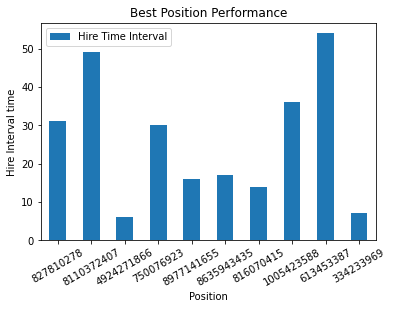

In [33]:
t = table2[table2.performance != 0][['hire_time', 'performance']].sort_values('performance').head(10)

t[['hire_time']].plot(kind='bar')

plt.xlabel('Position')
plt.ylabel('Hire Interval time')
plt.title('Best Position Performance')
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(labels=['Hire Time Interval']);

In [34]:
t['hire_time'].mean()

26.0

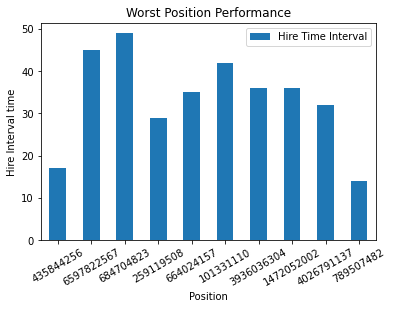

In [35]:
t = table2[table2.performance < np.inf][['hire_time', 'performance']].sort_values('performance', ascending=False).head(10)

t[['hire_time']].plot(kind='bar')

plt.xlabel('Position')
plt.ylabel('Hire Interval time')
plt.title('Worst Position Performance')
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(labels=['Hire Time Interval']);

In [36]:
t['hire_time'].mean()

33.5